# Project: Data Cleaning and Manipulation with Pandas

***
## <div class="alert alert-block alert-info"> <font color=blue> 0.- Start and Setup</font></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import re
from IPython.display import Image
from SRC.funciones import fatality
from SRC.funciones import countries
from SRC.funciones import clean_countries
from SRC.funciones import clean_year
from SRC.funciones import clean_areas

In [2]:
# Reading the CSV dataset, I have to change the encoding.
df = pd.read_csv('./INPUT/GSAF5.csv', encoding = "ISO-8859-1")

***
## <div class="alert alert-block alert-info"> <font color=blue> 1.- Exploring the dataset</font></div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
pdf                       5992 non-null object
href formula              5991 non-null object
href                      5989 non-null object
C

In [4]:
df.count()

Case Number               5992
Date                      5992
Year                      5992
Type                      5992
Country                   5949
Area                      5590
Location                  5496
Activity                  5465
Name                      5792
Sex                       5425
Age                       3311
Injury                    5965
Fatal (Y/N)               5973
Time                      2779
Species                   3058
Investigator or Source    5977
pdf                       5992
href formula              5991
href                      5989
Case Number.1             5992
Case Number.2             5992
original order            5992
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

In [5]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [6]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
df.shape

(5992, 24)

In [8]:
df.ndim

2

In [9]:
null_cols = df.isnull().sum()
null_cols

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [10]:
df.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

***
## <div class="alert alert-block alert-info"> <font color=blue> 2.- Cleaning the dataset</font></div>


In [11]:
# Removing the columns with lot of nulls, are useless.

dfclean = df.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)

In [12]:
# Remove the columns useless to my purpose

dfclean = dfclean.drop(['Case Number.1', 'Case Number.2','Case Number', 'Time', 'pdf','href','href formula' ], axis=1)

In [13]:
dfclean.head(4)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Investigator or Source,original order
0,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,NaN,"Orlando Sentinel, 9/19/2016",5993
1,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,NaN,"Orlando Sentinel, 9/19/2016",5992
2,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,NaN,"Orlando Sentinel, 9/19/2016",5991
3,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,"The Age, 9/18/2016",5990


In [14]:
# Renaming columns

dfclean.rename(columns={'Sex ':'Sex','Fatal (Y/N)':'Fatal','Species ':'Species', 'original order':'Original Order' }, inplace=True)
dfclean.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Species',
       'Investigator or Source', 'Original Order'],
      dtype='object')

In [15]:
# Check for duplicates, no action required
before = len(dfclean)
dfclean = dfclean.drop_duplicates()
after = len(dfclean)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


In [16]:
# Checking errors in 'Sex' column
dfclean['Sex'].value_counts()

M      4835
F       585
M         2
.         1
N         1
lli       1
Name: Sex, dtype: int64

In [17]:
set(dfclean['Sex'])

{'.', 'F', 'M', 'M ', 'N', 'lli', nan}

In [18]:
# Fixing wrong values in 'Sex' column, 2 versions. I should do this with a function but I prefer to show 
# an alternative way.
dfclean['Sex'] = dfclean['Sex'].replace("M ", 'M')
dfclean['Sex'] = dfclean['Sex'].replace('N', 'M')
dfclean['Sex'] = dfclean['Sex'].replace('.', 'X')
dfclean['Sex'] = dfclean['Sex'].replace('lli', 'X')
dfclean['Sex'].fillna("X", inplace = True)

In [19]:
# 
cleansex = list(dfclean[dfclean['Sex'] == "X"].index)
dfclean = dfclean.drop(cleansex, axis = 0)

In [20]:
set(dfclean['Sex'])

{'F', 'M'}

In [21]:
# Checkin errors in 'Fatal' column

In [22]:
set(dfclean['Fatal'])

{' N', '#VALUE!', 'N', 'UNKNOWN', 'Y', nan}

In [23]:
# Fixing 'Fatal' column with a function
dfclean['Fatal'] = dfclean['Fatal'].apply(fatality)

In [24]:
set(dfclean['Fatal'])

{'N', 'Y', nan}

In [25]:
# Checking errors in 'Country' column avoiding long output
print(list(set(dfclean['Country'])))

[nan, 'Fiji', 'BARBADOS', 'EGYPT ', 'IRAN / IRAQ', 'URUGUAY', 'MAURITIUS', 'JAMAICA', 'TASMAN SEA', 'MID-PACIFC OCEAN', 'BAHREIN', 'NAMIBIA', 'FEDERATED STATES OF MICRONESIA', 'NICARAGUA', 'TURKEY', 'IRAN', 'UNITED ARAB EMIRATES (UAE)', 'REUNION', 'KIRIBATI', 'MAYOTTE', 'MEXICO', 'OCEAN', 'TONGA', 'SAN DOMINGO', 'JAPAN', 'TANZANIA', 'CHILE', 'EGYPT / ISRAEL', 'MEDITERRANEAN SEA', 'ANDAMAN / NICOBAR ISLANDAS', 'NICARAGUA ', 'PACIFIC OCEAN', 'GUYANA', 'SOMALIA', 'SUDAN?', 'LIBYA', 'VANUATU', 'Between PORTUGAL & INDIA', 'NORTH ATLANTIC OCEAN', 'RED SEA / INDIAN OCEAN', 'EQUATORIAL GUINEA / CAMEROON', 'VENEZUELA', 'UNITED KINGDOM', 'CANADA', 'Coast of AFRICA', 'DIEGO GARCIA', 'COLUMBIA', 'SOUTH ATLANTIC OCEAN', 'SOLOMON ISLANDS / VANUATU', 'Seychelles', 'NEVIS', 'CYPRUS', 'BERMUDA', 'NEW ZEALAND', 'MOZAMBIQUE', 'ATLANTIC OCEAN', 'ITALY', 'SYRIA', 'BRITISH NEW GUINEA', 'THE BALKANS', 'LEBANON', ' TONGA', 'GABON', 'NORTHERN ARABIAN SEA', 'THAILAND', 'OKINAWA', 'PANAMA', 'TUNISIA', 'WESTERN S

In [26]:
# Change null values to UNKNOWN
dfclean['Country']=dfclean['Country'].fillna('UNKNOWN')
dfclean['Country'].isnull().sum()

0

In [27]:
# Fixing 'Country' column with a function
dfclean['Country'] = dfclean['Country'].apply(clean_countries)

In [28]:
# Checking errors in 'Year' column
dfclean['Year'].describe()

count    5423.000000
mean     1925.444403
std       288.345356
min         0.000000
25%      1942.000000
50%      1978.000000
75%      2004.000000
max      2016.000000
Name: Year, dtype: float64

In [29]:
dfclean['Year']

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
5987       0
5988       0
5989       0
5990       0
5991       0
Name: Year, Length: 5423, dtype: int64

In [30]:
#I want to delete rows before 1940 because they could be unreliable.
dfclean['Year'] = dfclean['Year'].apply(clean_year)
dfclean['Year'].describe()

count    4097.000000
mean     1987.823041
std        22.296873
min      1941.000000
25%      1966.000000
50%      1995.000000
75%      2008.000000
max      2016.000000
Name: Year, dtype: float64

In [31]:
dfclean['Year']

0       2016.0
1       2016.0
2       2016.0
3       2016.0
4       2016.0
         ...  
5987       NaN
5988       NaN
5989       NaN
5990       NaN
5991       NaN
Name: Year, Length: 5423, dtype: float64

In [32]:
# Cleaning 'Area' column
dfclean['Area'].fillna("Unknown", inplace = True)
dfclean['Area'] = dfclean['Area'].apply(clean_areas)
cleanarea = list(dfclean[dfclean['Area'] == "Unknown"].index)
dfclean = dfclean.drop(cleanarea, axis = 0)

In [33]:
dfclean['Year'].value_counts()

2015.0    137
2011.0    123
2013.0    121
2014.0    116
2008.0    115
         ... 
1973.0     22
1978.0     22
1979.0     22
1946.0     21
1945.0     13
Name: Year, Length: 76, dtype: int64

***
## <div class="alert alert-block alert-info"> <font color=blue> 3.- Analyzing the clean data set.</font></div>

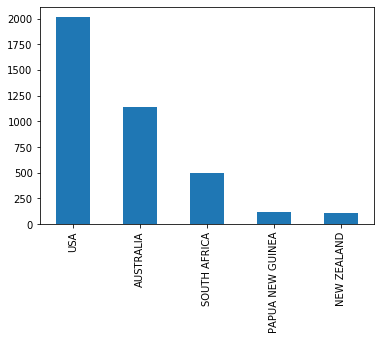

In [34]:
# Which country is the main victim of shark attacks
dfclean['Country'].value_counts().nlargest(5).plot(kind='bar')
plt.show()

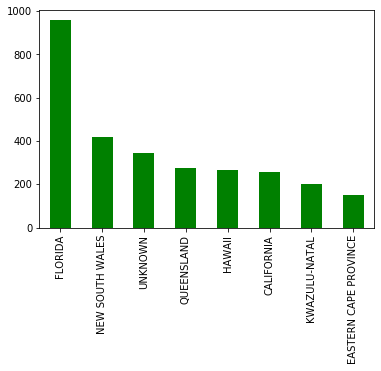

In [35]:
# Shark attacks per Area
dfclean['Area'].value_counts().nlargest(8).plot(kind='bar', color = 'green')
plt.show()

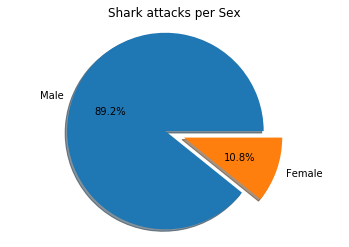

In [36]:
# Shark attacks per Sex
#dfclean['Sex'].value_counts().nlargest(2).plot(kind='bar', color = 'red')
Tasks = dfclean['Sex'].value_counts()
my_explode = (0, 0.2)

my_labels = 'Male','Female'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%', shadow = True, explode=my_explode)
plt.title('Shark attacks per Sex')
plt.axis('equal')
plt.show()


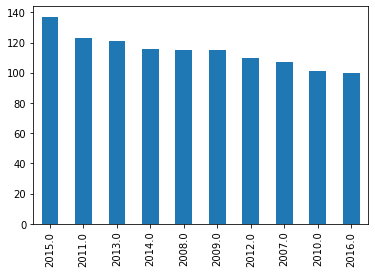

In [37]:
# Shark attacks per Year
dfclean['Year'].value_counts().nlargest(10).plot(kind='bar',)
plt.show()

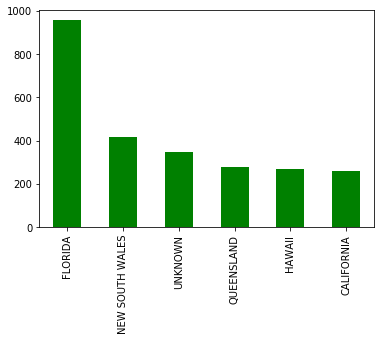

In [38]:
# Shark attacks per Area
dfclean['Area'].value_counts().nlargest(6).plot(kind='bar', color = 'green')
plt.show()

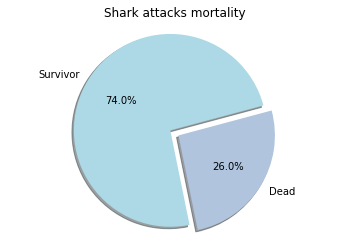

In [39]:
# Shark attacks mortality
#dfclean['Fatal'].value_counts().nlargest(3).plot(kind='bar', color='red')
Tasks = dfclean['Fatal'].value_counts()

my_labels = 'Survivor','Dead'
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Shark attacks mortality')
plt.axis('equal')
plt.show()

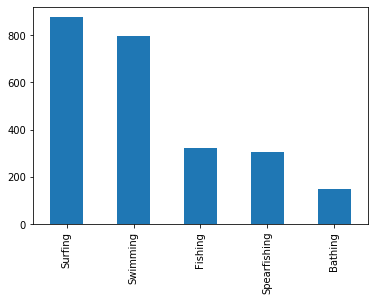

In [40]:
# Shark attacks per activity
dfclean['Activity'].value_counts().nlargest(5).plot(kind='bar')
plt.show()

In [41]:
# Function that search landlocked countries in the data set
df['Country'] = df['Country'].apply(countries)
set(df['Country'])

{None, 'PARAGUAY'}

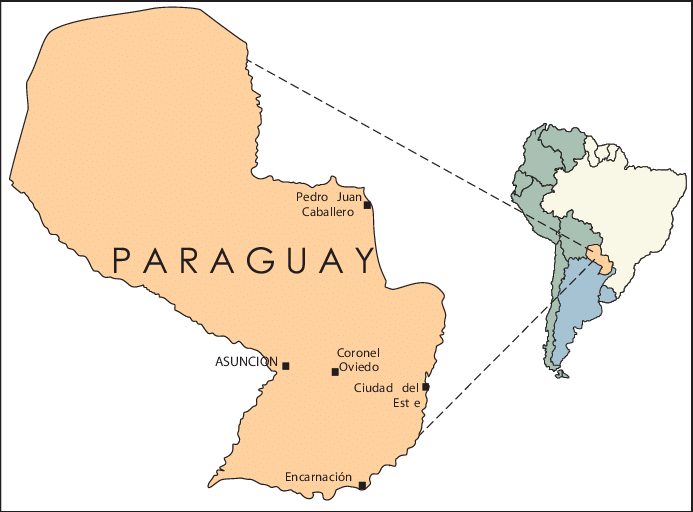

In [42]:
with open('./SRC/paraguay.png','rb') as file:
    display(Image(file.read()))

In [50]:
# How many people died in USA per Shark Attack 1989
dfclean3 = dfclean[((dfclean['Country'] =='USA') & (dfclean['Fatal'] =='Y') & (dfclean['Year'] == 1989))]
dfclean3['Country'].value_counts()


USA    6
Name: Country, dtype: int64

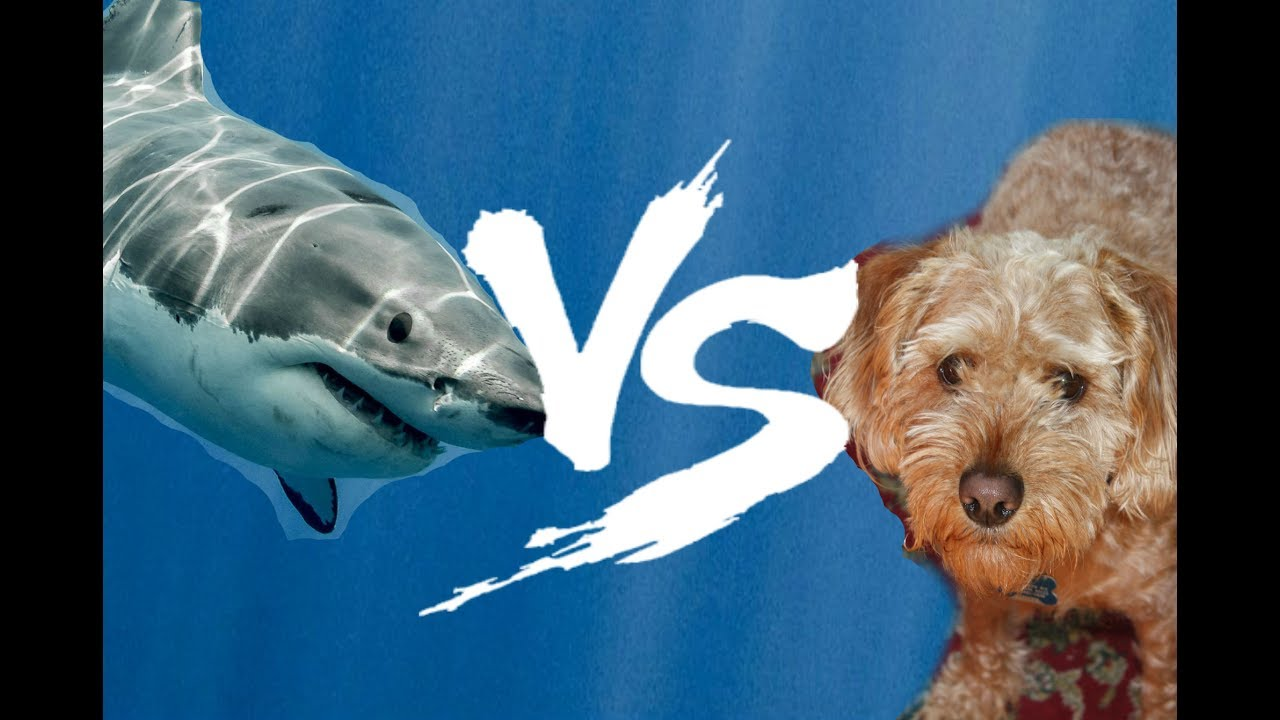

In [44]:
with open('./SRC/ds.jpg','rb') as file:
    display(Image(file.read()))

In [51]:
#How many people died in USA per Dog Attack in 1989
"https://en.wikipedia.org/wiki/List_of_fatal_dog_attacks_in_the_United_States_(before_2000)#Fatalities_in_1989"
#Conclussion
#According to Wikipedia same number of people died by Dogs and Sharks = 6

'https://en.wikipedia.org/wiki/List_of_fatal_dog_attacks_in_the_United_States_(before_2000)#Fatalities_in_1989'

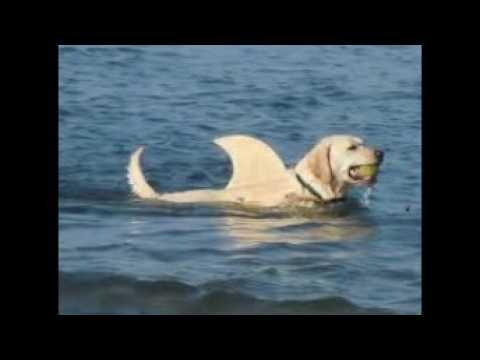

In [46]:
with open('./SRC/dp.jpg','rb') as file:
    display(Image(file.read()))

In [ ]:
# Export clean dataset to CSV
dfclean.to_csv('./OUTPUT/pandas-project.csv', index=False)